[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW1.ipynb)


**Problem 1**. Give an example of a variable that is (a) categorical; (b) quantitative; (c) discrete; (d) continuous.



a)Religion    

b)Population of Provo, UT

c)Number of monitors

d)Height (in inches)

**Problem 2**. Analyze the Carbon_West data file using the following code.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
carbon_west = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Carbon_West.dat")


Part a. Construct a histogram of CO2 emissions.

Text(0, 0.5, 'Frequency')

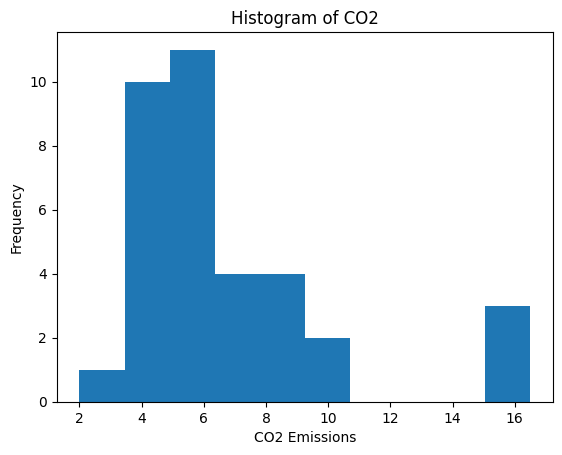

In [ ]:
plt.hist(carbon_west['CO2'])
plt.title('Histogram of CO2')
plt.xlabel('CO2 Emissions')
plt.ylabel('Frequency')



Part b. Find the mean, median, and standard deviation.

In [ ]:
data = carbon_west['CO2']
print("Mean: ")
print(data.mean())
print("\nMedian: ")
print(data.median())
print("\nStandard Deviation: ")
print(data.std())

Mean: 
6.717142857142858

Median: 
5.9

Standard Deviation: 
3.3569493954627134


**Problem 3**. Read in the murder data set using the following code. The variable murder is the murder rate (per 100,000 population) for each state in the U.S. in 2017 according to the FBI Uniform Crime Reports. At first, do not use the observation for D.C. (DC).

In [ ]:
murders = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Murder.dat")

Part a. Find the mean and standard deviation for murders without D.C.

In [ ]:
new_df = murders[murders['state'] != 'DC']
murder_stats_withoutDC = new_df['murder']
print("Mean and Standard Deviation without DC")
print("\nMean without DC: ")
print(murder_stats_withoutDC.mean())
print("\nStandard Deviation without DC:")
print(murder_stats_withoutDC.std())

Mean and Standard Deviation without DC

Mean without DC: 
4.874

Standard Deviation without DC:
2.586291174793806


Part b. Find the five-number  summary without D.C.

In [ ]:
print("Five number summary:")
murder_stats_withoutDC.describe()

Five number summary:


,murder
count,50.000000
mean,4.874000
std,2.586291
min,1.000000
25%,2.625000
50%,4.850000
75%,6.175000
max,12.400000


Part c. Now include the observation for D.C. and recalculate the mean, median, and five-number summary. What is affected more by this outlier: The mean or the median? The range or the inter-quartile range?

In [ ]:
murder_stats_withALL = murders['murder']
print("Mean with DC: ")
print(murder_stats_withALL.mean())
print("\nMedian with DC: ")
print(murder_stats_withALL.median())
print("\nFive number summary: ")
print(murder_stats_withALL.describe())

Mean with DC: 
5.252941176470588

Median with DC: 
5.0

Five number summary: 
count    51.000000
mean      5.252941
std       3.725391
min       1.000000
25%       2.650000
50%       5.000000
75%       6.450000
max      24.200000
Name: murder, dtype: float64


When we include the Washington DC statistic **the mean moves a lot more than the median.** The mean moves from 4.87 to 5.25 (a jump of 0.38) and the median moves from 4.85 to 5.00 (a jump of 0.15). So although both increase by a noticably large amount the mean is affected more by including DC.

Pertaining to the range and IQR, **the range is more affected by including DC**. The range goes from 11.4 to 23.2 (a jump of 11.8) whereas the IQR jumps from 3.55 to 3.8 (a jump of 0.25). So while both do increase the overall range significantly jumps, probably because we have a new max which is DC which is close to double what the old max is. And while the Q1 and Q3 do increase somewhat, it's not as much as the max.

**Problem 4**. Read in the Houses data file using the following code.  The variables include price (thousands of dollars), size (square feet), tax bill (dollars), number of bathrooms, number of bedrooms, and whether the house is new (1 = yes, 0 = no) for 100 home sales in Gainesville, Florida. Let
y = selling price and x = size of home.

In [ ]:
houses = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Houses.dat")
print(houses)

    case   price  size  new  taxes  bedrooms  baths
0      1  419.85  2048    0   3104         4      2
1      2  219.75   912    0   1173         2      1
2      3  356.55  1654    0   3076         4      2
3      4  300.00  2068    0   1608         3      2
4      5  239.85  1477    0   1454         3      3
..   ...     ...   ...  ...    ...       ...    ...
95    96  264.00  1060    0    990         2      2
96    97  294.75  1730    0   3030         3      2
97    98  198.30  1370    0   1580         3      2
98    99  132.60  1560    0   1770         3      2
99    10  190.80  1340    0   1430         3      2

[100 rows x 7 columns]


Part a. Construct a scatterplot between square feet and price of a home.

Text(0, 0.5, 'Price')

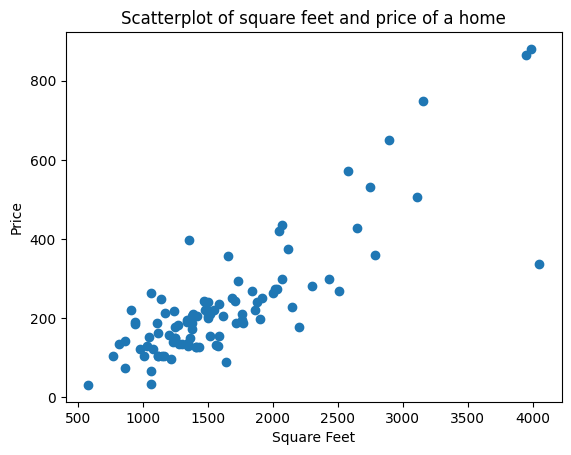

In [ ]:
plt.scatter(houses['size'], houses['price'])
plt.title("Scatterplot of square feet and price of a home")
plt.xlabel("Square Feet")
plt.ylabel("Price")



Part b. Find the correlation between the two variables.

In [ ]:
size = houses['size']
price = houses['price']
correlation = size.corr(price)
print("Correlation between Square Feet and Price:")
print(correlation)

Correlation between Square Feet and Price:
0.8337847885586537


Part c. Find and plot the regression line on top of the scatterplot.

Text(0, 0.5, 'Price')

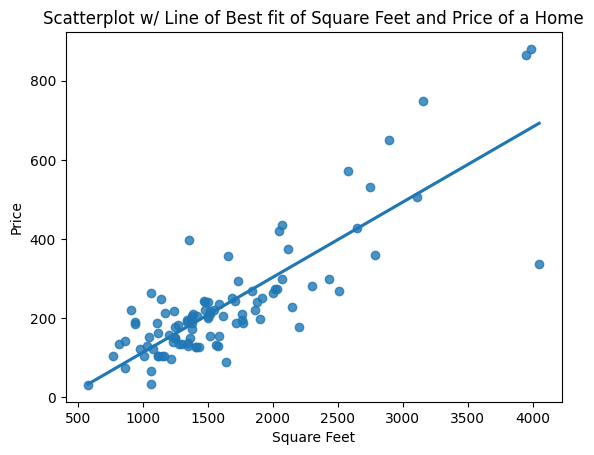

In [ ]:
import seaborn as sns
sns.regplot(x=houses['size'], y=houses['price'], ci=None) #ci none shows only the line, notging else
plt.title("Scatterplot w/ Line of Best fit of Square Feet and Price of a Home")
plt.xlabel("Square Feet")
plt.ylabel("Price")

Part d. Create a side by side boxplot of price comparing homes that are new and homes that are not new.

Text(0, 0.5, 'Price')

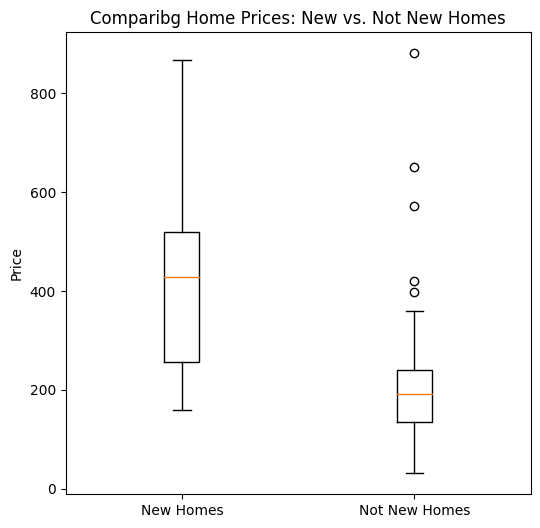

In [ ]:
new = houses[houses['new'] == 1]['price']
not_new = houses[houses['new'] == 0]['price']


fig, plot = plt.subplots(figsize=(6, 6))
plot.boxplot([new, not_new], labels=['New Homes', 'Not New Homes'])

plot.set_title('Comparibg Home Prices: New vs. Not New Homes')
plot.set_ylabel('Price')


Part e. What is the relationship between size and price.  Justify your answer using the plots created. Do the same for the relationship between price and whether or not a house is new, again using the plot to justify your answer.

**There is a strong positive linear correlation between the size (in sq feet) and the price.** This is shown by our having a correlation of +0.833 and we can visually see this in the scatterplot showing size and price, as well as from the line of best fit which is increasing and positive. As the size of the house increases the price also increases.

For the relationship **between price and whether or not a house is new there is a strong a relationship between this.** New Homes surely do cost more on average than not new homes. This is hown by the box plot where we look at the price of new homes and not new homes. We see that the minimum is greater for new homes, the median is also greater in new homes, by more than double. The Q1 and Q3 are also greater in the new homes. Although Not New Homes has a few outliers that are equally high as new homes, we still see that on average and generally speaking New Homes cost more than not new homes. We can visually see the new homes are higher up on the graph compared to 'not new homes', which a higher y value means the price is higher.

**Problem 5**. Using the Happy data file read in by the following code. Construct the contingency table relating marital status and happiness.

In [ ]:
happy = pd.read_csv("https://stat4ds.rwth-aachen.de/data/Happy.dat", sep = "\\s+")
print(happy.columns)
print(happy)

Index(['subject', 'happiness', 'marital', 'gender'], dtype='object')
      subject  happiness  marital  gender
0           1          1        1    male
1           2          1        1    male
2           3          1        1    male
3           4          1        1    male
4           5          1        1    male
...       ...        ...      ...     ...
2137     2138          3        3  female
2138     2139          3        3  female
2139     2140          3        3  female
2140     2141          3        3  female
2141     2142          3        3  female

[2142 rows x 4 columns]


In [ ]:
contingency_table = pd.crosstab(happy['marital'], happy['happiness'])
contingency_table

happiness,1,2,3
marital,,,
1,432,504,61
2,92,282,103
3,124,409,135
